---
# <span style="color:blue">**Simple Decision Tree**</span>
---

---
### **Load merged training and validation data & test data**
---

In [1]:
import functions as fn

X_te, y_te, y_te_labels, test_features, te_filenames = fn.load_data('testfile_mobile_v2.npz', 'Test')
X_tr_merged, y_tr_merged, y_tr_labels_merged, train_features_merged, train_filenames_merged = fn.merge_tr_val_sets()

Test data info:
---------------
X: (50, 224, 224, 3)
y: (50, 6)
labels: (6,)
features: (50, 1280)
filenames (50,) 

Training data info:
-------------------
X: (280, 224, 224, 3)
y: (280, 6)
labels: (6,)
features: (280, 1280)
filenames (280,) 

Validation data info:
---------------------
X: (139, 224, 224, 3)
y: (139, 6)
labels: (6,)
features: (139, 1280)
filenames (139,) 

merged training and validation data info:
-----------------------------------------
X: (419, 224, 224, 3)
y: (419, 6)
labels: (6,)
features: (419, 1280)
filenames (419,) 



---
### **Preprocess input data**
---

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer

pipe = Pipeline([
    ('scaler', Normalizer()),
    ('pca', PCA(n_components=260)),
])

pipe.fit(train_features_merged)

processed_train_features = pipe.transform(train_features_merged)
processed_test_features = pipe.transform(test_features)

---
### **Define and fit a Simple Decision Tree**
---

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree
dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=3, 
    random_state=0
)

# Fit decision tree without PCA
dt.fit(train_features_merged, y_tr_merged)

# Get score
print('Test accuracy w/o PCA:', dt.score(test_features, y_te))


# Fit decision tree
dt.fit(processed_train_features, y_tr_merged)

# Get score
print('Test accuracy with PCA:', dt.score(processed_test_features, y_te))

Test accuracy w/o PCA: 0.52
Test accuracy with PCA: 0.8


---
    The DecisionTreeClassifier with a depth of 3, gives much better test accuracy when reducing the number of dimensions with PCA. 
---

---
### **Save test accuracy**
---

In [4]:
fn.save_test_accuracy('decision_tree.csv','decision_tree', dt.score(processed_test_features, y_te))

---
### **Plot the tree**
---

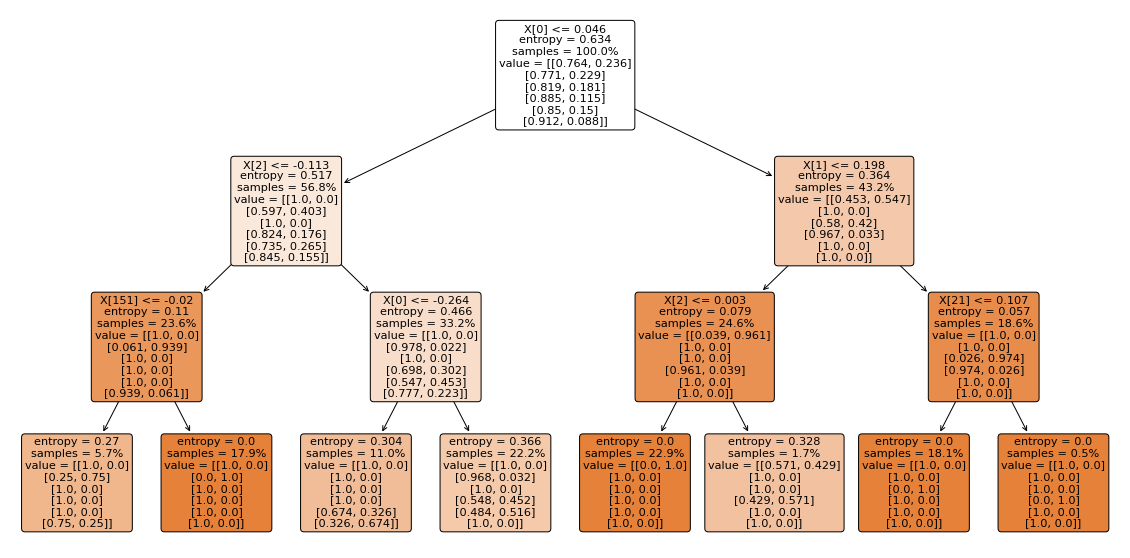

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt, 
               class_names=list(y_tr_labels_merged), 
               filled=True, rounded=True, proportion=True)
plt.show()